In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

### Data Preprocessing Steps
1. Resize
2. Flatten

### Loading the data in the program

In [2]:
target = []
images = []
flatten_data = []

directory = './images/'
category = ['pink lotus flower','red rose flower','white daisy flower']


for cat in category:
    path = os.path.join(directory,cat)
    # print(path)
    for img in os.listdir(path):
        target.append(category.index(cat))
        img_data = imread(os.path.join(path,img))
        # print(img_data.shape)
        img_resize = resize(img_data,(200,400,3)) #automatically normalize the data
        images.append(img_resize)
        flatten_data.append(img_resize.flatten())
        # plt.imshow(img_resize)
             
        
    

In [6]:
target = np.array(target)
flatten_data = np.array(flatten_data)
images = np.array(images)

In [7]:
print(flatten_data.shape)
print(target.shape)
print(images.shape)

(130, 240000)
(130,)
(130, 200, 400, 3)


[0 1 2]
[42 42 46]


<BarContainer object of 3 artists>

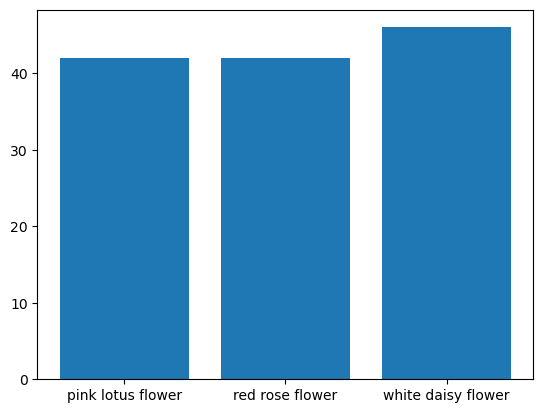

In [8]:
unique,count = np.unique(target,return_counts=True)
print(unique)
print(count)
plt.bar(category,count)

### Model Training

In [9]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(flatten_data,target,test_size=0.3,random_state=49)

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
    {'C':[1,10,100,1000],'kernel':['linear']},
    {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [11]:
y_pred = clf.predict(x_test)
y_pred

array([2, 2, 0, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 2, 0,
       0, 1, 0, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 0, 1, 2, 0])

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.7692307692307693